# Total Adjusted Carbon Offset by State  
This plot shows the potential total carbon offset of each state if the potential roofs had solar panels. It's created with the base data found within Google's Project Sunroof dataset and modified to account for how much each state already uses carbon free energy sources. As an example, if 50% of California's energy already came from carbon free sources than their potential carbon offset isn't 6.71e+07 metric tons, as stated in the dataset. The data what percent of power is produced by carbon free sources comes from the EPA. Currently these plots assume that carbon based power sources emit the same amount of CO2 per BTU, which is not true. With more time, these factors will be taken into account.  
  
As this is the first file using adjusted carbon offset, the work will be shown here and saved as a new csv file for ease of use in further plots.

In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Import project sunroof data into pandas from CSV.
sunroof_state = '../Resources/ProjectSunroofClean/project-sunroof-state-clean.csv'
sunroof_state_df = pd.read_csv(sunroof_state)

#sunroof_state_df.head()

In [3]:
#Import power source data into pandas from CSV.
power_source = '../Resources/OtherData/power_sources_by_state.csv'
power_source_df = pd.read_csv(power_source)

#power_source_df.head()

In [12]:
#Reindex sunroof_state_df to just be state name and carbon offset.
sunroof_state_trimmed_df = sunroof_state_df.reindex(columns = ['state_name', 'carbon_offset_metric_tons'])
sunroof_state_trimmed_df = sunroof_state_trimmed_df.rename(columns = {'state_name': 'state', 'carbon_offset_metric_tons': 'total_carbon_offset_metric_tons'})
#sunroof_state_trimmed_df.head()

In [13]:
#Reindex power_source_df to just be state name and Carbon sources. Also divide Carbon Sources by 100 to get the percent value.
power_source_trimmed_df = power_source_df.reindex(columns = ['State', 'Carbon Sources'])
power_source_trimmed_df = power_source_trimmed_df.rename(columns = {'State': 'state', 'Carbon Sources': 'percent_carbon_sources'})
power_source_trimmed_df['percent_carbon_sources'] = power_source_trimmed_df['percent_carbon_sources']/100
#power_source_trimmed_df.head()

In [23]:
#Join the dataframes
adjusted_carbon_offset_working_df = sunroof_state_trimmed_df.join(power_source_trimmed_df.set_index('state'), on = "state")
adjusted_carbon_offset_working_df = adjusted_carbon_offset_working_df.set_index('state')
adjusted_carbon_offset_working_df.head()


,total_carbon_offset_metric_tons,percent_carbon_sources
state,,
Alabama,1.580000e+07,0.668
Alaska,4.499588e+05,0.711
Arizona,2.540000e+07,0.596
Arkansas,7.162306e+06,0.718
California,6.710000e+07,0.535


In [24]:
#Multiply carbon offset and carbon sources to get the adujsted carbon offset, and save as a CSV file.
adjusted_carbon_offset_working_df['adjusted_carbon_offset_metric_tons'] = adjusted_carbon_offset_working_df['total_carbon_offset_metric_tons'] * adjusted_carbon_offset_working_df['percent_carbon_sources']
adjusted_carbon_offset_working_df.head()


,total_carbon_offset_metric_tons,percent_carbon_sources,adjusted_carbon_offset_metric_tons
state,,,
Alabama,1.580000e+07,0.668,1.055440e+07
Alaska,4.499588e+05,0.711,3.199207e+05
Arizona,2.540000e+07,0.596,1.513840e+07
Arkansas,7.162306e+06,0.718,5.142536e+06
California,6.710000e+07,0.535,3.589850e+07


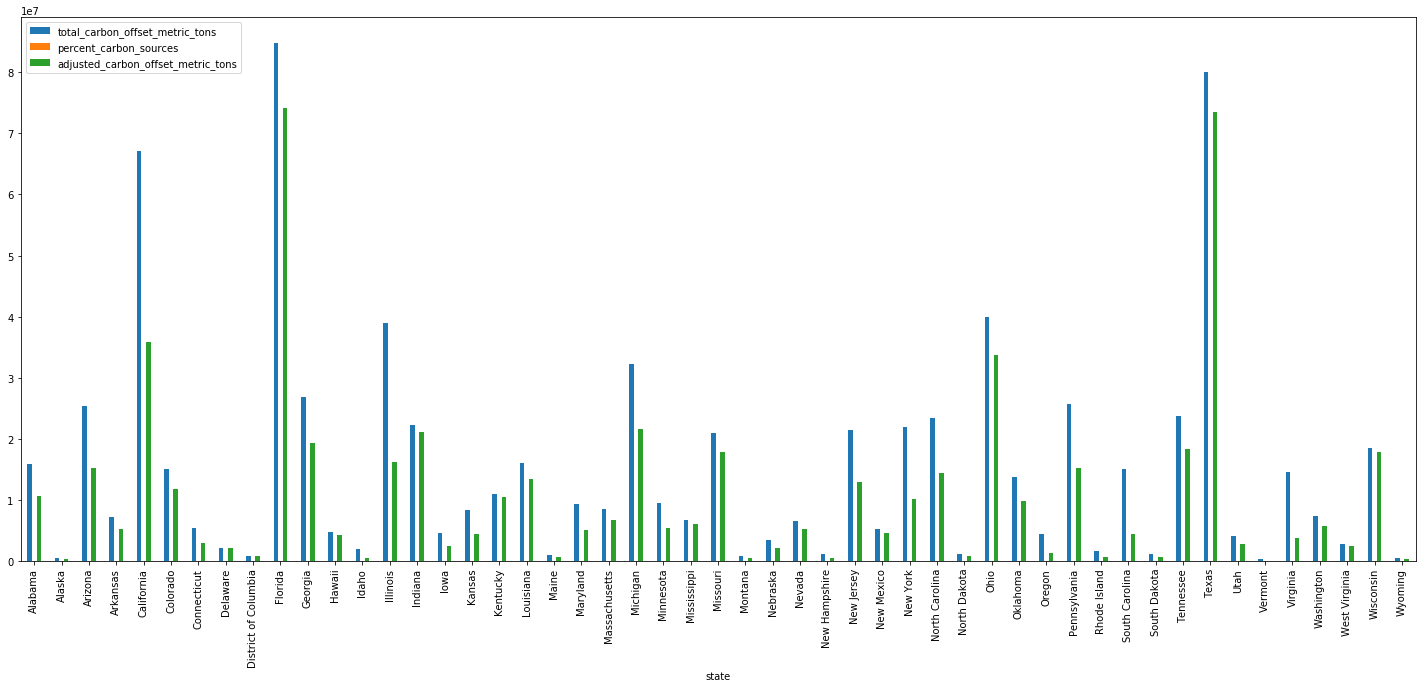

In [26]:
#Bar chart of Total Adjusted Carbon Offset by State, and save as a png file.
adjusted_carbon_offset_working_df.plot.bar(figsize=(25,10))